<a href="https://colab.research.google.com/github/Tkaheva/MO/blob/main/homework_practice_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Лабораторная 2.1

Есть два набора точек - *x_hw* и *y_hw*. В рамках домашней работы нужно
* визуализировать набор точек
* найти коэффициенты регрессии $w_0, w_1$ по шагам, как на семинаре
* посчитать предсказание в виде $\hat{y} = w_0 + w_1x$ и визуализировать его вместе с точками *x_hw* и *y_hw*

In [1]:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

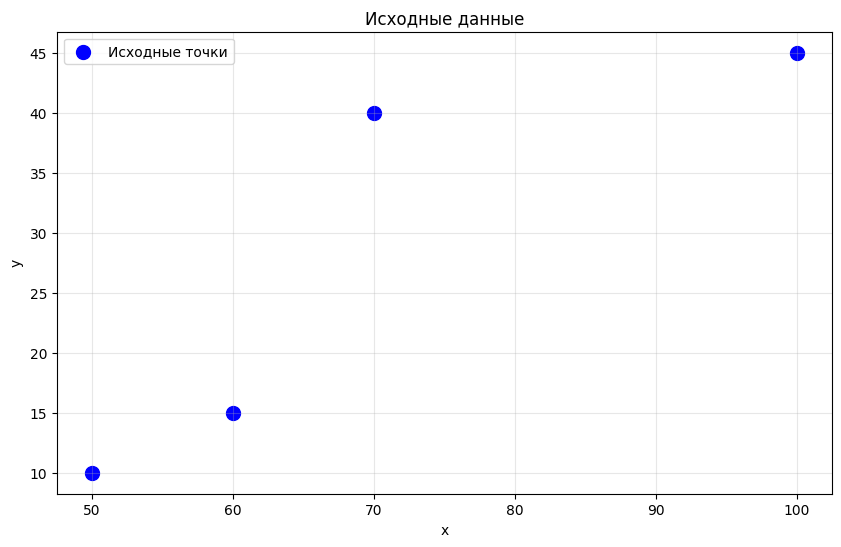

Коэффициенты: w0 = -22.5000, w1 = 0.7143


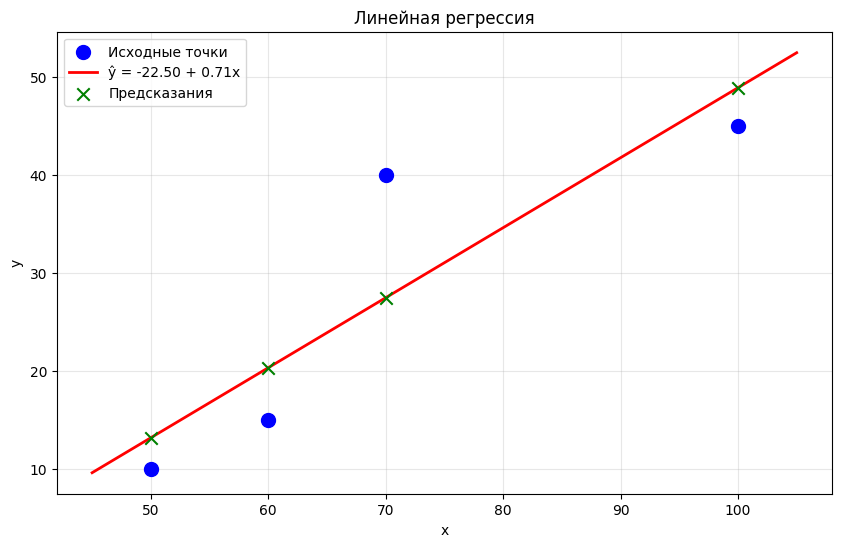

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Данные
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

# 1. Визуализация исходных данных
plt.figure(figsize=(10, 6))
plt.scatter(x_hw, y_hw, color='blue', s=100, label='Исходные точки')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Исходные данные')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# 2. Расчет коэффициентов
x = np.array(x_hw)
y = np.array(y_hw)

x_mean = np.mean(x)
y_mean = np.mean(y)
xy_mean = np.mean(x * y)
x2_mean = np.mean(x**2)

w1 = (xy_mean - x_mean * y_mean) / (x2_mean - x_mean**2)
w0 = y_mean - w1 * x_mean

print(f"Коэффициенты: w0 = {w0:.4f}, w1 = {w1:.4f}")

# 3. Предсказания и визуализация
y_pred = w0 + w1 * x

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', s=100, label='Исходные точки', zorder=5)

x_line = np.linspace(min(x)-5, max(x)+5, 100)
y_line = w0 + w1 * x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'ŷ = {w0:.2f} + {w1:.2f}x')

plt.scatter(x, y_pred, color='green', s=80, marker='x', label='Предсказания', zorder=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная регрессия')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Модель обучена! Коэффициенты: w0 = -22.5000, w1 = 0.7143
1. Первоначальные данные:


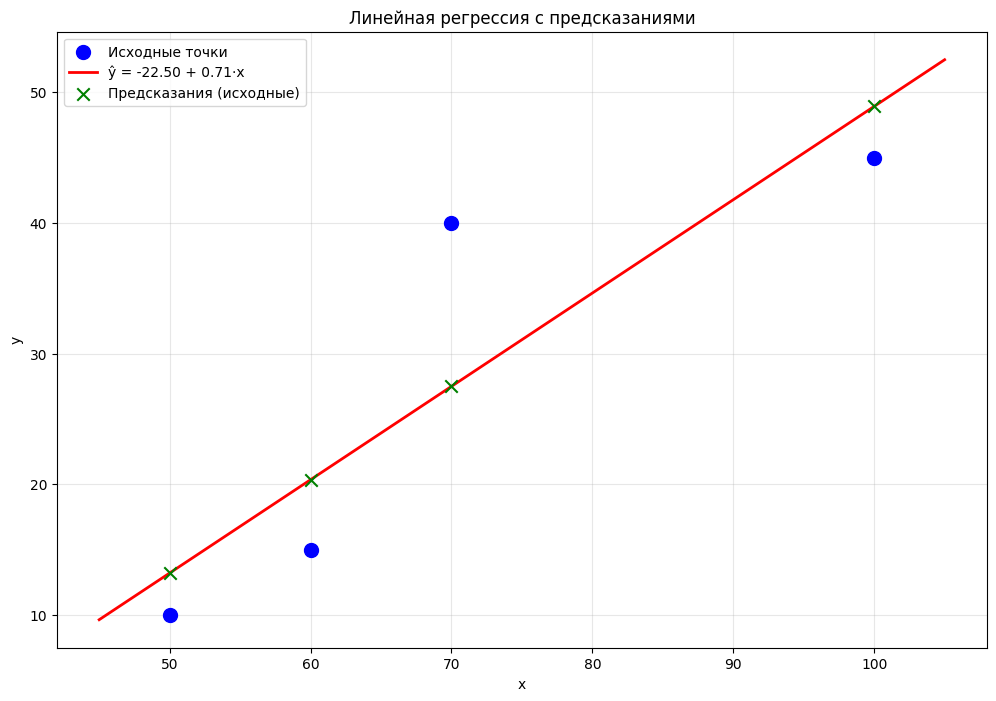


2. Новые предсказания:
x = 55 → ŷ = 16.79
x = 65 → ŷ = 23.93
x = 80 → ŷ = 34.64
x = 90 → ŷ = 41.79
x = 110 → ŷ = 56.07

3. Визуализация с новыми точками:


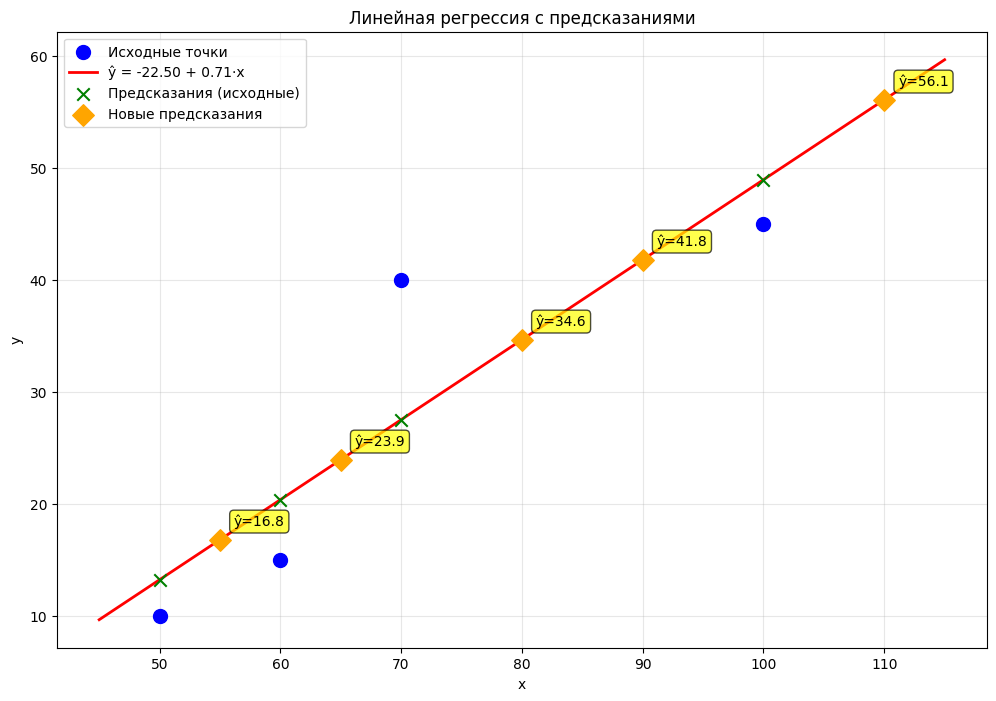


4. Добавление отдельных точек:
x = 85 → ŷ = 38.21

5. Уравнение регрессии:
ŷ = -22.5000 + 0.7143·x

6. Статистика модели:
Количество исходных точек: 4
Диапазон x: 50 - 100
Диапазон y: 10 - 45

ИНТЕРАКТИВНЫЙ РЕЖИМ
Введите значение x для предсказания (или 'stop' для выхода): 99
x = 99.0 → ŷ = 48.21
Показать график с этой точкой? (y/n): y


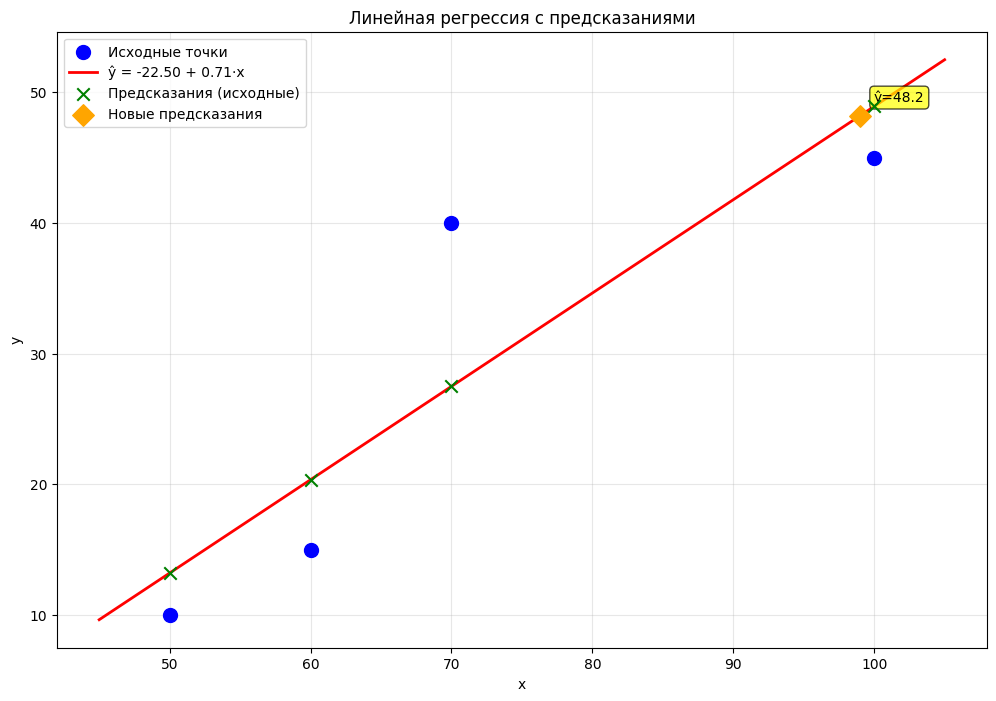

Введите значение x для предсказания (или 'stop' для выхода): 77
x = 77.0 → ŷ = 32.50
Показать график с этой точкой? (y/n): y


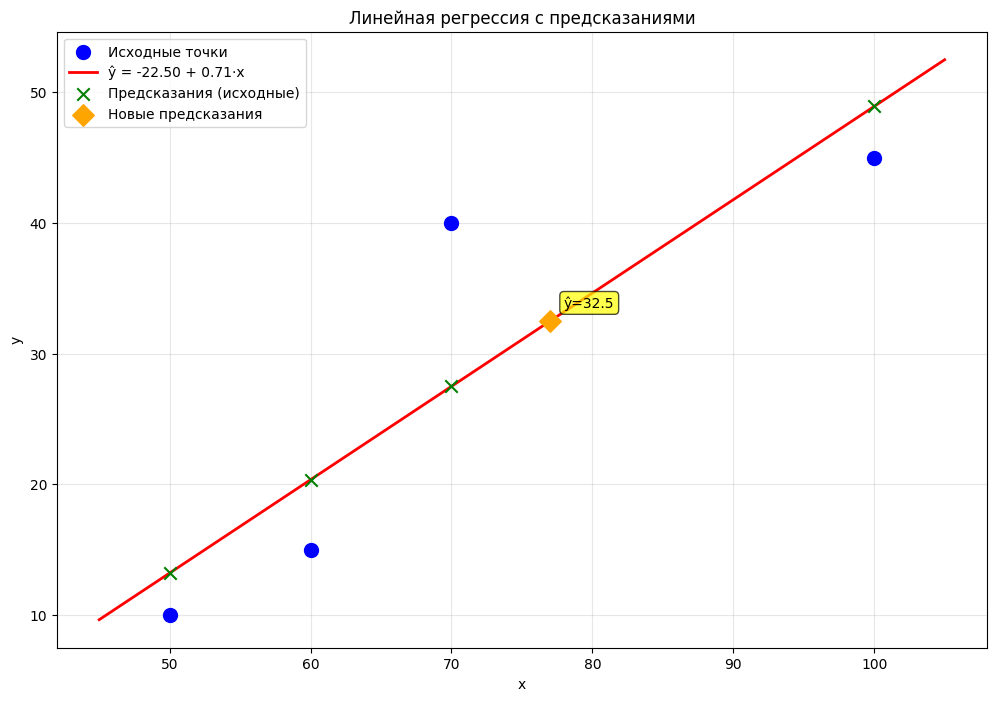

Введите значение x для предсказания (или 'stop' для выхода): stop


In [9]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionPredictor:
    def __init__(self):
        self.w0 = None
        self.w1 = None
        self.x_data = None
        self.y_data = None

    def fit(self, x, y):
        """Обучение модели на данных"""
        self.x_data = np.array(x)
        self.y_data = np.array(y)

        # Расчет коэффициентов
        x_mean = np.mean(self.x_data)
        y_mean = np.mean(self.y_data)
        xy_mean = np.mean(self.x_data * self.y_data)
        x2_mean = np.mean(self.x_data**2)

        self.w1 = (xy_mean - x_mean * y_mean) / (x2_mean - x_mean**2)
        self.w0 = y_mean - self.w1 * x_mean

        print(f"Модель обучена! Коэффициенты: w0 = {self.w0:.4f}, w1 = {self.w1:.4f}")

    def predict(self, x):
        """Предсказание для новых данных"""
        if self.w0 is None or self.w1 is None:
            raise ValueError("Модель не обучена! Сначала вызовите fit()")

        x_array = np.array(x)
        return self.w0 + self.w1 * x_array

    def visualize(self, new_x=None, show_predictions=True):
        """Визуализация данных и предсказаний"""
        if self.w0 is None or self.w1 is None:
            raise ValueError("Модель не обучена! Сначала вызовите fit()")

        plt.figure(figsize=(12, 8))

        # Исходные точки
        plt.scatter(self.x_data, self.y_data, color='blue', s=100,
                   label='Исходные точки', zorder=5)

        # Линия регрессии
        x_min, x_max = min(self.x_data), max(self.x_data)
        if new_x is not None:
            x_min = min(x_min, min(new_x))
            x_max = max(x_max, max(new_x))

        x_line = np.linspace(x_min - 5, x_max + 5, 100)
        y_line = self.w0 + self.w1 * x_line
        plt.plot(x_line, y_line, color='red', linewidth=2,
                label=f'ŷ = {self.w0:.2f} + {self.w1:.2f}·x')

        # Предсказания для исходных данных
        if show_predictions:
            y_pred_original = self.predict(self.x_data)
            plt.scatter(self.x_data, y_pred_original, color='green', s=80,
                       marker='x', label='Предсказания (исходные)', zorder=5)

        # Новые предсказания
        if new_x is not None:
            new_x_array = np.array(new_x)
            new_y_pred = self.predict(new_x_array)

            plt.scatter(new_x_array, new_y_pred, color='orange', s=120,
                       marker='D', label='Новые предсказания', zorder=6)

            # Подписи для новых точек
            for i, (x_val, y_val) in enumerate(zip(new_x_array, new_y_pred)):
                plt.annotate(f'ŷ={y_val:.1f}', (x_val, y_val),
                           xytext=(10, 10), textcoords='offset points',
                           bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Линейная регрессия с предсказаниями')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.show()

    def get_equation(self):
        """Получить уравнение регрессии"""
        if self.w0 is None or self.w1 is None:
            return "Модель не обучена"
        return f"ŷ = {self.w0:.4f} + {self.w1:.4f}·x"

# ИСПОЛЬЗОВАНИЕ КЛАССА:

# Исходные данные
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

# Создаем и обучаем модель
model = LinearRegressionPredictor()
model.fit(x_hw, y_hw)

# 1. Первоначальная визуализация
print("1. Первоначальные данные:")
model.visualize()

# 2. Добавляем новые точки для предсказания
new_points = [55, 65, 80, 90, 110]
predictions = model.predict(new_points)

print(f"\n2. Новые предсказания:")
for x, y_pred in zip(new_points, predictions):
    print(f"x = {x} → ŷ = {y_pred:.2f}")

# 3. Визуализация с новыми предсказаниями
print(f"\n3. Визуализация с новыми точками:")
model.visualize(new_x=new_points)

# 4. Можно добавлять точки по одной
print(f"\n4. Добавление отдельных точек:")
single_point = 85
single_prediction = model.predict([single_point])[0]
print(f"x = {single_point} → ŷ = {single_prediction:.2f}")

# 5. Уравнение регрессии
print(f"\n5. Уравнение регрессии:")
print(model.get_equation())

# 6. Дополнительная информация
print(f"\n6. Статистика модели:")
print(f"Количество исходных точек: {len(x_hw)}")
print(f"Диапазон x: {min(x_hw)} - {max(x_hw)}")
print(f"Диапазон y: {min(y_hw)} - {max(y_hw)}")

# Функция для интерактивного добавления точек
def interactive_prediction(model):
    """Интерактивное добавление точек"""
    print("\n" + "="*50)
    print("ИНТЕРАКТИВНЫЙ РЕЖИМ")
    print("="*50)

    while True:
        try:
            user_input = input("Введите значение x для предсказания (или 'stop' для выхода): ")
            if user_input.lower() == 'stop':
                break

            x_val = float(user_input)
            y_pred = model.predict([x_val])[0]
            print(f"x = {x_val} → ŷ = {y_pred:.2f}")

            # Спросить, показать ли график
            show_plot = input("Показать график с этой точкой? (y/n): ")
            if show_plot.lower() == 'y':
                model.visualize(new_x=[x_val])

        except ValueError:
            print("Ошибка! Введите число или 'stop'")
        except Exception as e:
            print(f"Ошибка: {e}")

# Запуск интерактивного режима (раскомментируйте при необходимости)
interactive_prediction(model)

w0 = -22.499999999999943, w1 = 0.7142857142857141


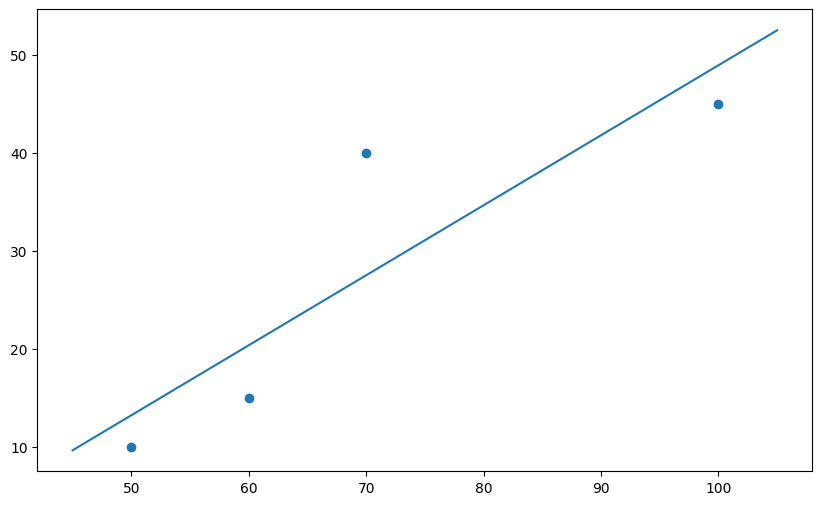

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

plt.figure(figsize = (10, 6))
plt.scatter(x_hw, y_hw)
#plt.plot(x_hw, y_hw)

#Find coef regression
X = np.array([[1, 50],[1, 60],[1, 70],[1, 100]])
Y = np.array([[10],[15],[40],[45]])
x_t_x = X.T.dot(X)
x_inv = np.linalg.inv(x_t_x)
x_t_y = X.T.dot(Y)
coef = x_inv.dot(x_t_y)
w0 = coef[0][0]
w1 = coef[1][0]
print(f'w0 = {coef[0][0]}, w1 = {coef[1][0]}')

#pred
#y^=w0+w1x
lin_reg = np.linspace(min(x_hw) - 5, max(x_hw) + 5, 100)
y = w0 + w1 * lin_reg
plt.plot(lin_reg, y)
plt.show()




w0 = -22.5000, w1 = 0.7143


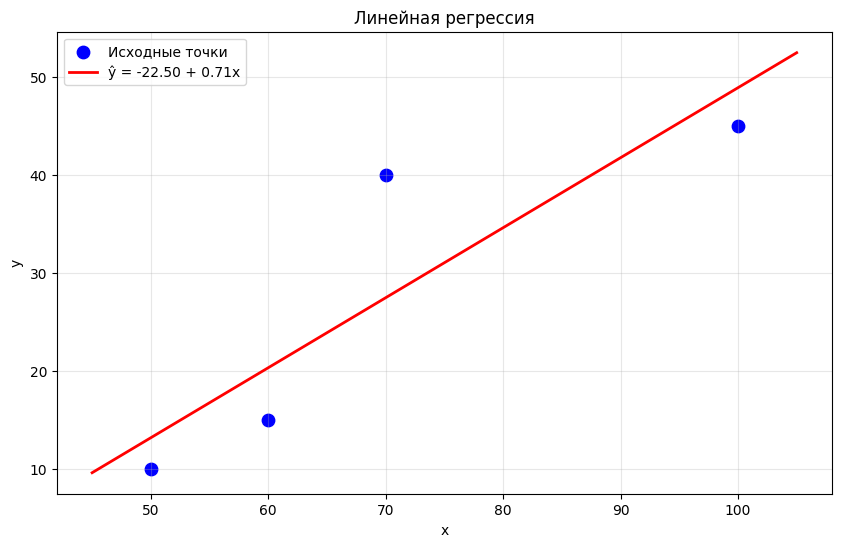


Предсказания:
x = 50, y = 10, ŷ = 13.21
x = 60, y = 15, ŷ = 20.36
x = 70, y = 40, ŷ = 27.50
x = 100, y = 45, ŷ = 48.93

R² = 0.7722


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Данные
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

# Визуализация исходных точек
plt.figure(figsize=(10, 6))
plt.scatter(x_hw, y_hw, color='blue', s=80, label='Исходные точки')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная регрессия')
plt.grid(True, alpha=0.3)

# Вычисление коэффициентов регрессии
X = np.array([[1, 50],[1, 60],[1, 70],[1, 100]])
Y = np.array([[10],[15],[40],[45]])

x_t_x = X.T.dot(X)
x_inv = np.linalg.inv(x_t_x)  # Исправил np.invert на np.linalg.inv
x_t_y = X.T.dot(Y)
coef = x_inv.dot(x_t_y)

w0 = coef[0][0]
w1 = coef[1][0]

print(f'w0 = {w0:.4f}, w1 = {w1:.4f}')

# Построение линии регрессии
x_line = np.linspace(min(x_hw)-5, max(x_hw)+5, 100)
y_line = w0 + w1 * x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'ŷ = {w0:.2f} + {w1:.2f}x')

plt.legend()
plt.show()

# Предсказания для исходных точек
y_pred = w0 + w1 * np.array(x_hw)
print("\nПредсказания:")
for i in range(len(x_hw)):
    print(f"x = {x_hw[i]}, y = {y_hw[i]}, ŷ = {y_pred[i]:.2f}")

# Вычисление R²
ss_res = np.sum((np.array(y_hw) - y_pred)**2)
ss_tot = np.sum((np.array(y_hw) - np.mean(y_hw))**2)
r2 = 1 - (ss_res / ss_tot)
print(f"\nR² = {r2:.4f}")